In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns

In [8]:
# Cargamos el dataset en una estructura DataFrame de Pandas
data = pd.read_excel(r"C:\Users\Santi\OneDrive\Escritorio\Proyectos DTS\Datathon\E-Commerce_train.xlsx")
data.drop(columns=['ID'], inplace=True)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
categoricos = [cat for cat in data.columns if data[cat].dtype == 'object' and data[cat].nunique() < 10]
numericos = [num for num in data.columns if data[num].dtype != 'object']

Separando en caracteristicas y variables objetivos (CREO QUE TENGO Q SACAR EL ID)

In [10]:
X = data.loc[:,[dx for dx in data.columns if dx not in ['Reached.on.Time_Y.N', 'Gender']]]
y = data['Reached.on.Time_Y.N']

In [11]:
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,44,1233
1,F,Flight,4,5,216,2,low,59,3088
2,A,Flight,2,2,183,4,low,48,3374
3,B,Flight,3,3,176,4,medium,10,1177
4,C,Flight,2,2,184,3,medium,46,2484


Separando valores en train test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

Pipelines

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate


OrdinalEncoder  

In [15]:
encoder = OrdinalEncoder()
standard = StandardScaler() 

In [16]:

encoder_standard = ColumnTransformer(transformers=[
    ('encoder', encoder, categoricos[:3]),
    ('standar', standard, [num for num in numericos if num not in ['Reached.on.Time_Y.N']])
])

OneHotEncoder

In [17]:
encoder2 = OneHotEncoder()
standard2 = StandardScaler()

In [18]:
encoder_standard2 = ColumnTransformer(transformers=[
    ('encoder', encoder2, categoricos[:3]),
    ('standar'), standard2, [num for num in numericos if num not in ["Reached.on.Time_Y.N"]]
])

Ordinal encoder

In [19]:
modelLogistic = LogisticRegression()

In [20]:
pipeline_linearR = Pipeline(steps=[
    ('columnsTransforms', encoder_standard),
    ('modeloLineal', modelLogistic)
])

In [21]:
pipeline_linearR.fit(train_x,train_y)

Pipeline(steps=[('columnsTransforms',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('modeloLineal', LogisticRegression())])

In [22]:
prediction = pipeline_linearR.predict(test_x)

In [23]:
from sklearn.metrics import confusion_matrix,recall_score
matrix = confusion_matrix(test_y,prediction)
print(matrix)
print(recall_score(test_y,prediction))

[[ 545  468]
 [ 405 1282]]
0.7599288678126852


OneHotEncoder

In [24]:
pipeline_linear_oh = Pipeline(steps=[
    ('columnsTransforms',encoder_standard2),
    ('modeloLineal',modelLogistic)
])

In [25]:
pipeline_linear_oh.fit(train_x,train_y)

TypeError: 'StandardScaler' object is not iterable

In [26]:
prediction_l_oh = pipeline_linear_oh.predict(test_x)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [27]:
matrix_l_oh = confusion_matrix(test_y,prediction_l_oh)
print(matrix_l_oh)
print(recall_score(test_y, prediction_l_oh))

NameError: name 'prediction_l_oh' is not defined

Arbol de desicion

OrdinalEncoder

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
recall = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ('previo', encoder_standard),
        ('modeloTree', modeloTree)
    ])
    pipeline_tree.fit(train_x, train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

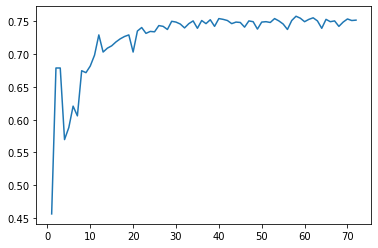

In [30]:
sns.lineplot(x=range(1,73), y=recall)

In [31]:
max(recall)

0.7575577949021932

OneHotEncoder

In [32]:
recall_tree_oh = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ('previo',encoder_standard2),
        ('modeloTree', modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall_tree_oh.append(recall_score(test_y,prediction_tree))

TypeError: 'StandardScaler' object is not iterable

In [ ]:
sns.lineplot(x=range(1,73), y=recall_tree_oh)

In [ ]:
max(recall_tree_oh)

Forest

Ordinal

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
parans_forest = {
    'n_estimators': range(10,30),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(10,30)
}

In [35]:
modeloForest = RandomForestClassifier(random_state=1)
gridForest = GridSearchCV(modeloForest, parans_forest, scoring='recall')

In [36]:
pipeline_forest = Pipeline(steps=[ 
    ('previo',encoder_standard),
    ('gridForest',gridForest)
])

In [37]:
pipeline_forest.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridForest',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': range(10, 30),
                                          'n_estimators': range(10, 30)},
                              scoring='recall'))])

In [38]:
pred_forest = pipeline_forest.predict(test_x)

In [39]:
recall_score(test_y,pred_forest )

0.7243627741553053

OneHotEncoder

In [40]:
pipeline_forest2 = Pipeline(steps=[ 
    ('previo',encoder_standard2),
    ('gridForest',gridForest)
])

In [ ]:
pipeline_forest2.fit(train_x,train_y)

In [ ]:
pred_forest2 = pipeline_forest2.predict(test_x)

In [ ]:
recall_score(test_y,pred_forest2)

SVM

Ordinal

In [42]:
from sklearn.svm import SVC

In [47]:
parametros_svm = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'gamma': ('scala','auto')
}

In [48]:
modelSVC = SVC(random_state=1)
gridSVC = GridSearchCV(modelSVC, parametros_svm, scoring='recall')

In [63]:
pipeline_svc2 = Pipeline(steps=[ 
    ('previo',encoder_standard),
    ('gridSVC', gridSVC)
])

In [64]:
pipeline_svc2.fit(train_x,train_y)

c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Santi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got ''scala'' instead.

  warn

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridSVC',
                 GridSearchCV(estimator=SVC(random_state=1),
                              param_grid={'gamma': ('scala', 'auto'),
                                          'kernel': ('linear', 'poly', 'rbf',
                                                     'sigmoid')},
                              scoring='recall'))])

In [65]:
pred_svc = pipeline_svc2.predict(test_x)
recall_score(test_y,pred_svc)

0.7291049199762892

In [66]:
ecomerce = pd.read_excel(r'C:\Users\Santi\OneDrive\Escritorio\Proyectos DTS\Datathon\E-Commerce_test.xlsx')

In [67]:
ecomerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [68]:
categoricos_e = [cat for cat in ecomerce.columns if ecomerce[cat].dtype == 'object' and ecomerce[cat].nunique() < 10]
numericos_e = [num for num in ecomerce.columns if ecomerce[num].dtype != 'object']

In [58]:
categoricos_e

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [59]:
numericos_e

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [69]:
ecomerce_test = ecomerce[numericos_e+categoricos_e]

In [70]:
ecomerce_test.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,9000,5,1,189,2,10,5248,F,Ship,medium,M
1,9001,5,3,150,2,9,4446,D,Ship,high,F
2,9002,3,3,200,3,3,5739,F,Ship,low,M
3,9003,5,1,133,2,1,4643,A,Ship,medium,M
4,9004,4,2,260,3,4,5504,B,Ship,low,M


In [71]:
pred_final = pipeline_svc2.predict(ecomerce_test)

In [72]:
df = pd.DataFrame({'pred':pred_final})

In [73]:
df.to_csv('../santigll.csv',index=False)